# import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from sklearn.model_selection import cross_val_score,GridSearchCV

# get dataset

In [2]:
data=pd.read_csv('heart1.csv')

In [3]:
print("no of rows",data.shape[0])
print("no of columns",data.shape[1])

no of rows 303
no of columns 14


In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2.0,0


In [5]:
#dropping some features based on our visualisation
data.drop(['sex','trestbps','chol','fbs'],axis=1,inplace=True)
#checking missing values
data.isna().sum()

age        0
cp         0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         5
thal       2
target     0
dtype: int64

In [6]:
camode=data.ca.mode()
thalmode=data.thal.mode()
print(camode)
print(thalmode)

0    0.0
dtype: float64
0    2.0
dtype: float64


In [7]:
data.ca.fillna(0,inplace=True)
data.thal.fillna(2,inplace=True)
data.isna().sum()
#no missing values

age        0
cp         0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
target     0
dtype: int64

In [8]:
#converting categorical variable to type object to make dummies easily
data['cp']=data.cp.astype(str)
data['restecg']=data.restecg.astype(str)
data['exang']=data.exang.astype(str)
data['slope']=data.slope.astype(str)
data['thal']=data.thal.astype(str)
data=pd.get_dummies(data,['cp','restecg','exang','slope','thal'],drop_first=True)

Here we have changed te data types from int64 as they are categorical in nature and each number represents a category and we have assumed that there is no hierarchy between them.each number in a column represents a category so it is adviseable to create dummies.

In [9]:
y=data.iloc[:,-1]
X=data.iloc[:,:-1]

# splitting to train and test set

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# model

In [11]:
classifier=RandomForestClassifier(random_state=0,criterion='entropy',max_depth=10)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# k-fold cross validation

In [12]:
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
print("Mean accuracy is",accuracies.mean())
print("Standard deviation is",accuracies.std())

Mean accuracy is 0.9296666666666666
Standard deviation is 0.052892973698466475


# grid search

In [13]:
from sklearn.model_selection import GridSearchCV
parameters = [
    {'criterion':['entropy'],'max_depth':[10,15],'n_estimators':[100,120,140,150,160]},
              {'criterion':['gini'],'max_depth':[10,15],'n_estimators':[100,120,140,150,160]}
             ]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 92.97 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}


In [14]:
y_pred=classifier.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        34
           1       0.93      1.00      0.96        27

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61

Accuracy of model for test set is: 0.9672131147540983
Roc score 0.9705882352941176


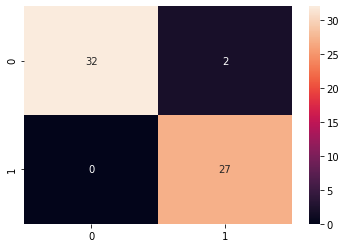

In [15]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))
print("Accuracy of model for test set is:",accuracy_score(y_test,y_pred))
print("Roc score",roc_auc_score(y_test,y_pred))

# feature importance in the model made

In [16]:
feature_scores = pd.Series(classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_scores)

thal_2.0     0.462036
thalach      0.102185
age          0.098500
oldpeak      0.097857
target       0.066234
exang_1      0.038586
ca           0.033106
restecg_1    0.020783
cp_2         0.020401
slope_2      0.015695
slope_1      0.014779
cp_1         0.012684
cp_3         0.011938
restecg_2    0.005216
dtype: float64


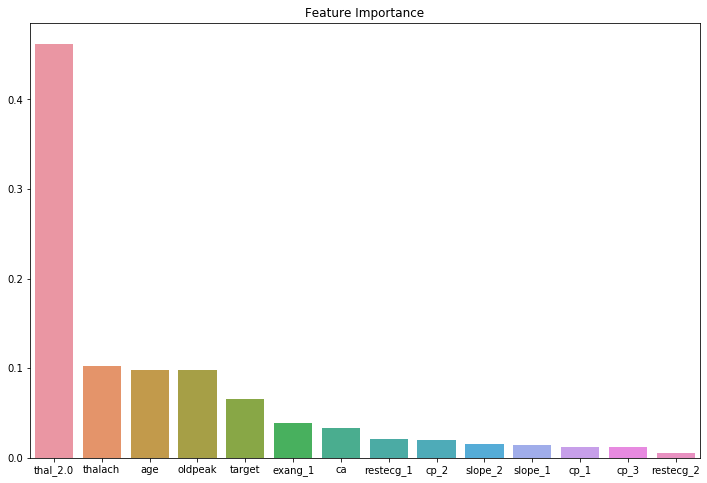

In [17]:
X_train=pd.DataFrame(X_train)
plt.figure(figsize=(12,8))
plt.title('Feature Importance')
sns.barplot(x=feature_scores.index,y=feature_scores)